# Part 2 Data Analysis

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

dsdata = pd.read_excel('Data/full_dataset.xlsx')
dsdata = dsdata.replace('unknown', np.nan)
dsdata.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,NaN,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [2]:
dsdata.dtypes

age                 int64
job                object
marital            object
education          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
duration            int64
campaign            int64
pdays               int64
previous            int64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
y                  object
dtype: object

In [3]:
dsdata.describe(include=['O']) #describe the "Object" type elements

,job,marital,education,default,housing,loan,contact,month,day_of_week,poutcome,y
count,40858,41108,39457,32591,40198,40198,41188,41188,41188,41188,41188
unique,11,3,7,2,2,2,2,10,5,3,2
top,admin.,married,university.degree,no,yes,no,cellular,may,thu,nonexistent,no
freq,10422,24928,12168,32588,21576,33950,26144,13769,8623,35563,36548


In [4]:
dsdata.describe() #describe the "numerical" type elements

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


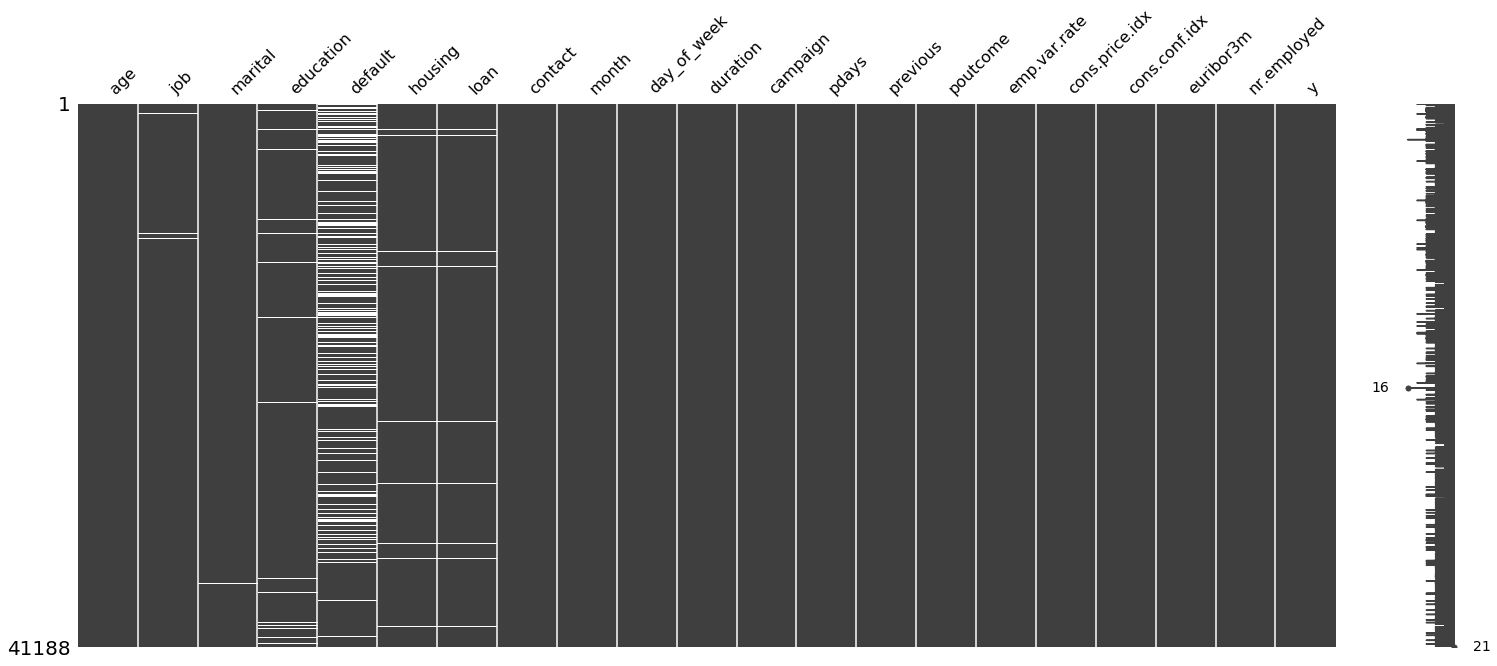

In [5]:
msno.matrix(dsdata) #visualizing missing data

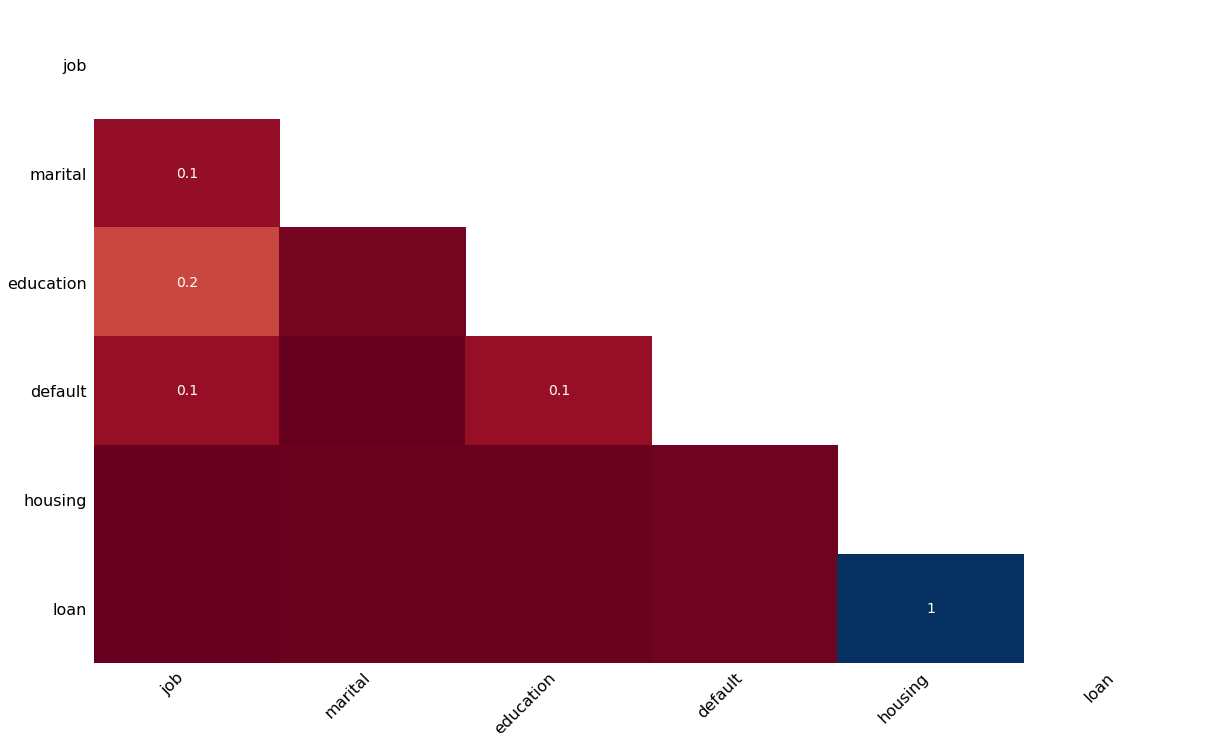

In [6]:
msno.heatmap(dsdata)#nullity correlation: how strongly the presence or absence of one variable affects the presence of another

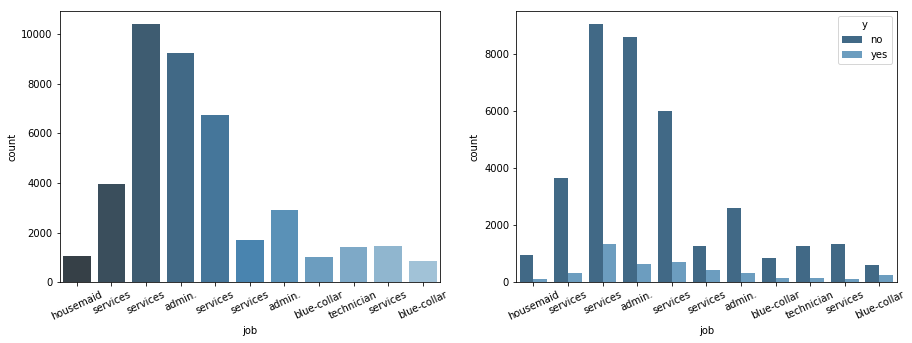

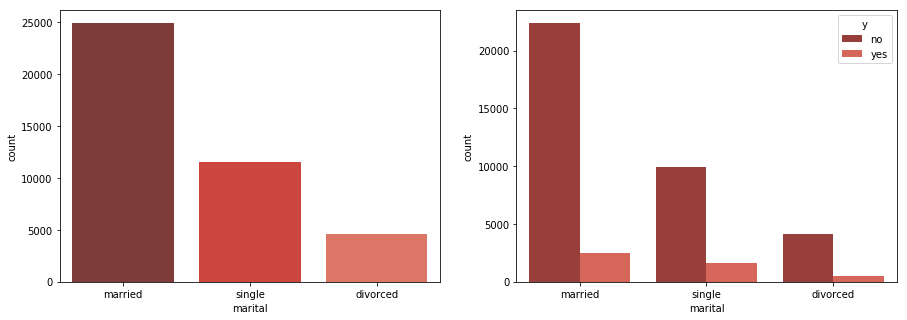

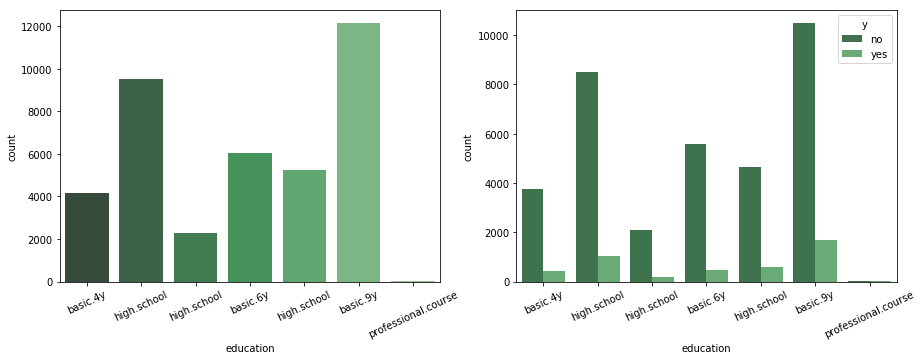

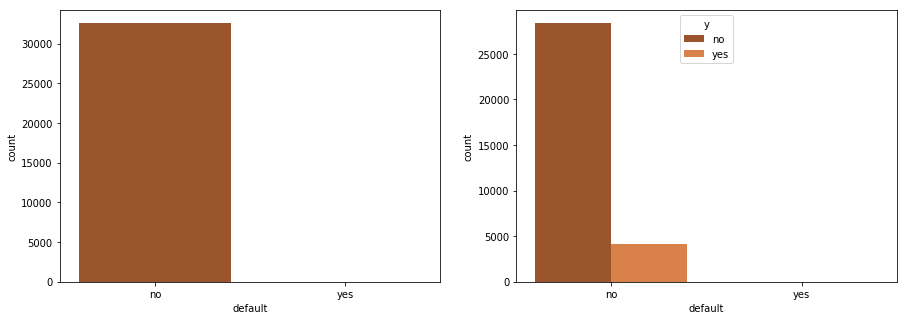

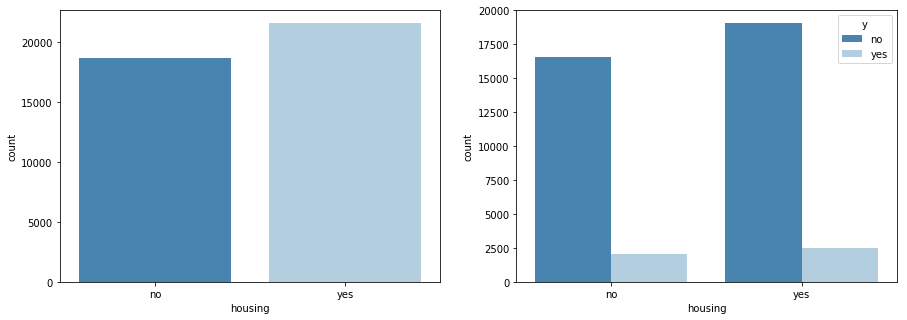

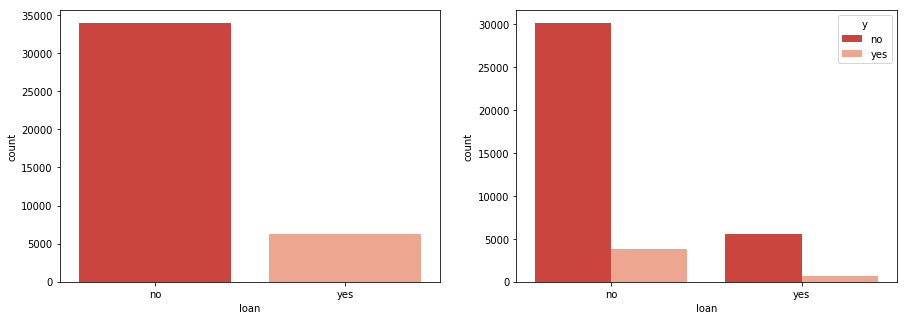

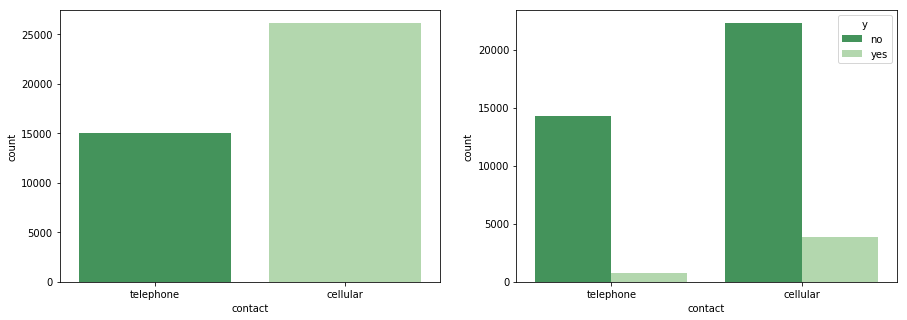

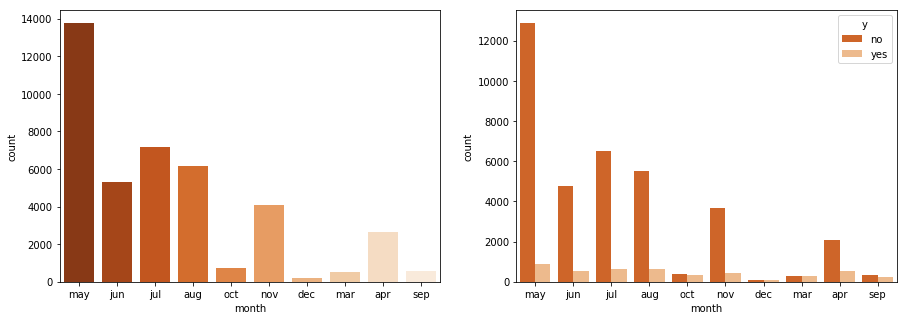

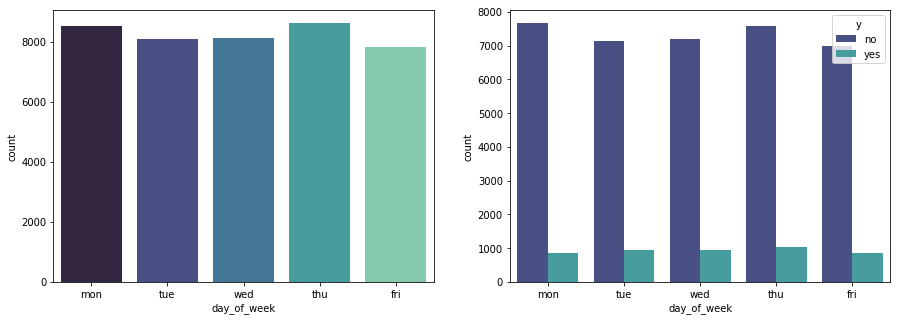

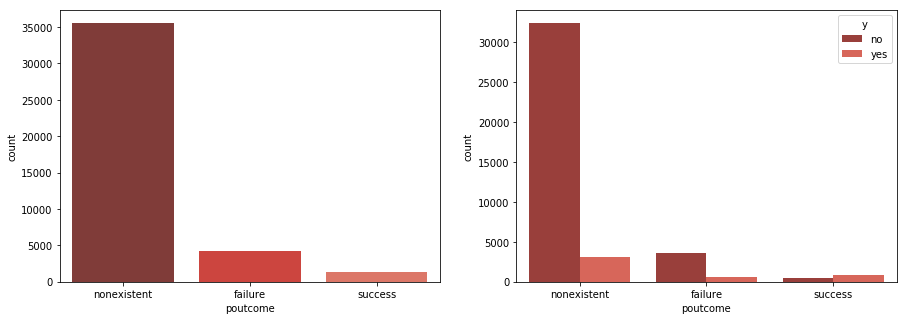

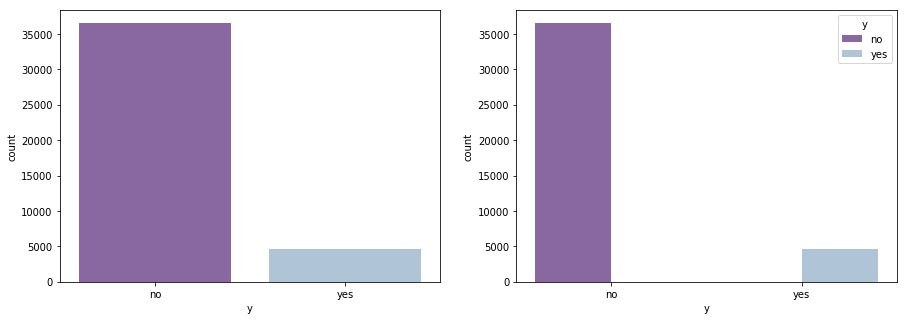

In [7]:
# Barplots for categorical (object) variables
column = "job"
colors = ['Blues_d', 'Reds_d', 'Greens_d', 'Oranges_d', 'Blues_r', 'Reds_r', 'Greens_r', 'Oranges_r', 'mako', 'Reds_d','BuPu_r']
color_coef=0
for column in dsdata.columns:
    if dsdata[column].dtype == "O":
        if column=='job' or column=='education':
            fig,ax=plt.subplots(1,2,figsize=(15,5))
            t = sns.countplot(x=column, data=dsdata, palette=colors[color_coef], ax=ax[0])
            t = t.set_xticklabels(dsdata[column], rotation=25)
            g = sns.countplot(x=dsdata[column], hue=dsdata['y'], palette=colors[color_coef], ax=ax[1])
            t = g.set_xticklabels(dsdata[column], rotation=25)
        else:
            fig,ax=plt.subplots(1,2,figsize=(15,5))
            t = sns.countplot(x=column, data=dsdata, palette=colors[color_coef], ax=ax[0])
            g = sns.countplot(x=dsdata[column], hue=dsdata['y'], palette=colors[color_coef], ax=ax[1])
        color_coef +=1

In [8]:
def histogram(variable):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {}".format(variable))
    ax = sns.distplot(dsdata[variable],color=sns.color_palette("RdYlGn_r")[0])
    
def histogram_by_deposit(feature):
    plt.figure(figsize=(10, 5))
    plt.title("Histogram for {} with deposit".format(feature))
    ax0 = sns.distplot(dsdata[dsdata["y"]=="no"][feature],color=sns.color_palette("Pastel2")[0],label="deposit_No")
    ax1 = sns.distplot(dsdata[dsdata["y"]=="yes"][feature],color=sns.color_palette("Pastel2")[2],label="deposit_Yes")
    plt.legend()

C:\Users\nlkha\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


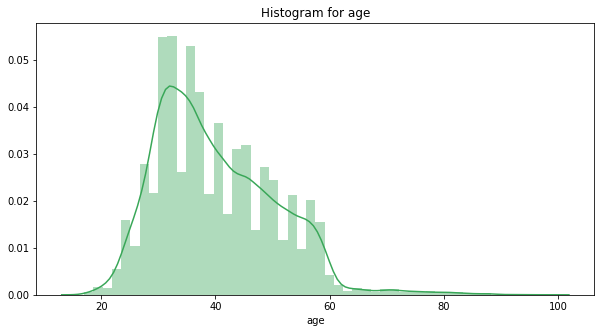

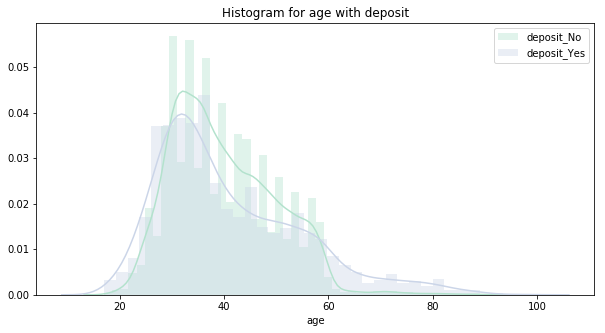

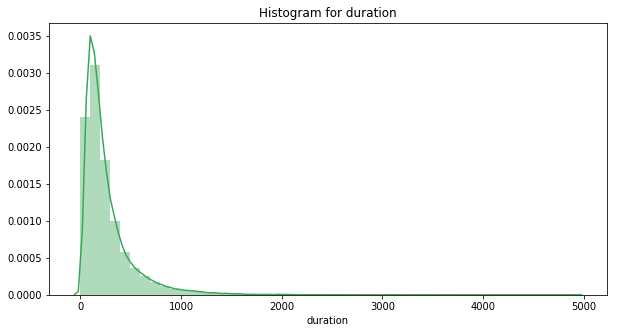

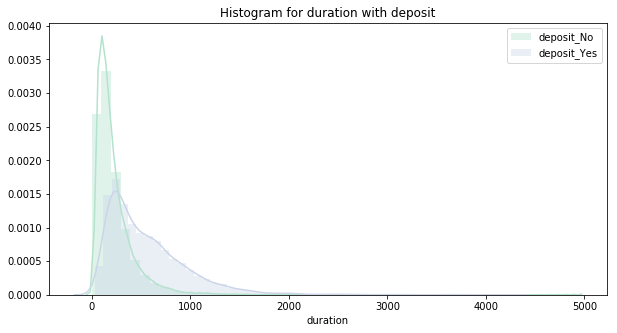

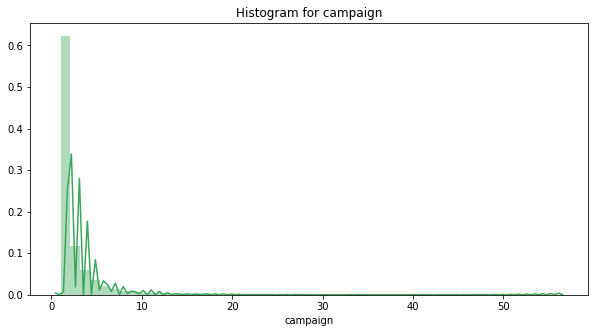

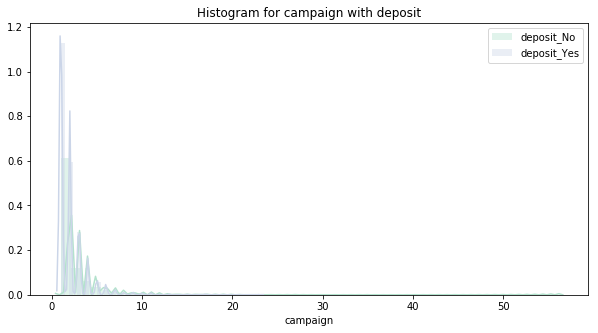

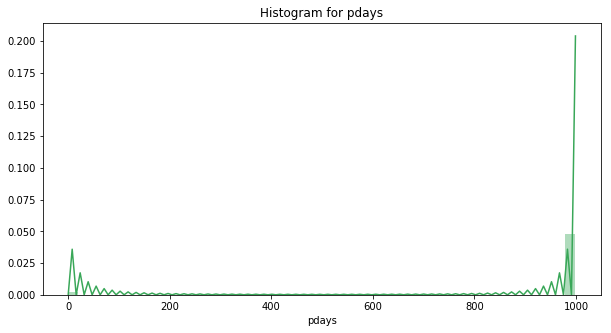

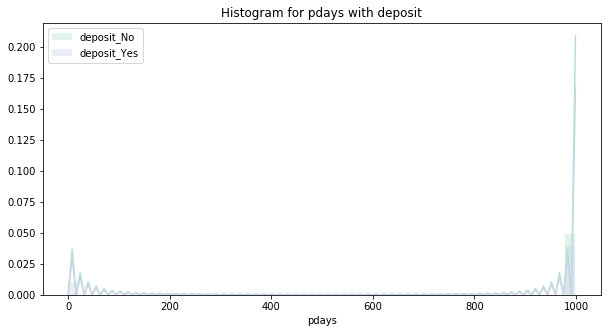

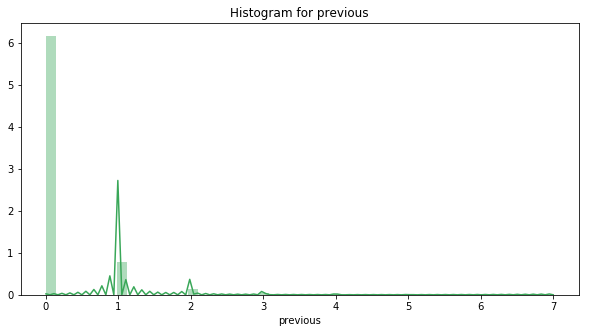

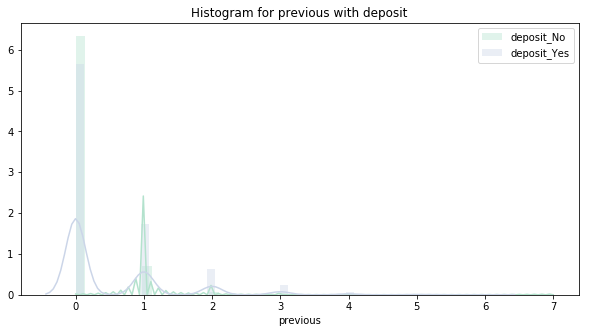

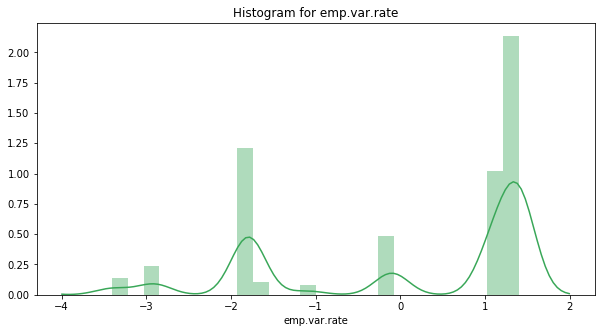

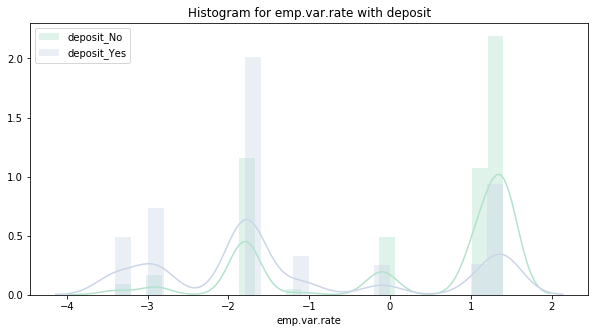

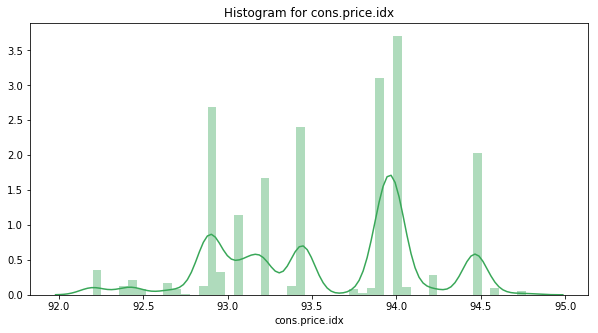

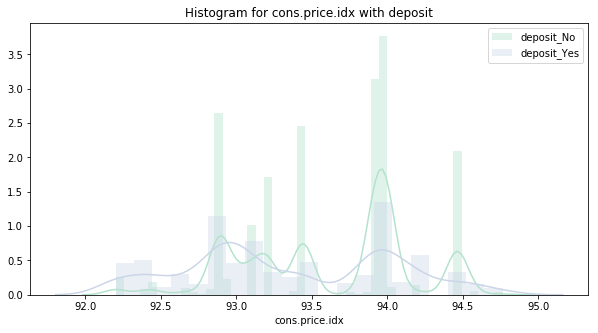

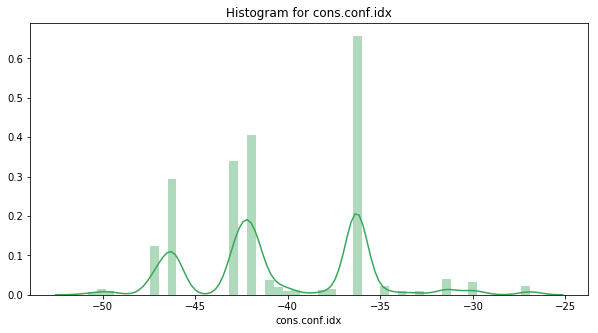

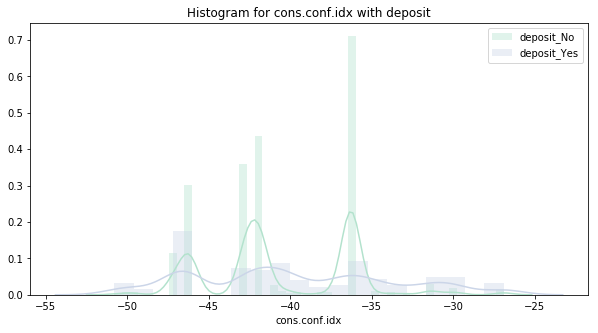

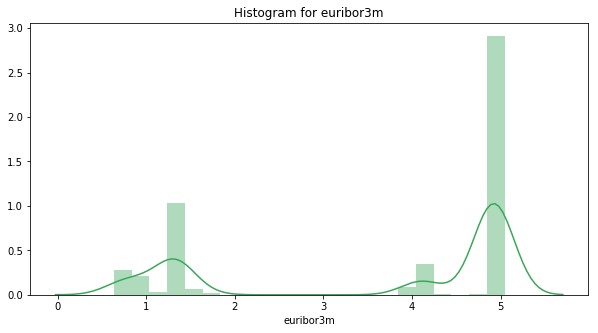

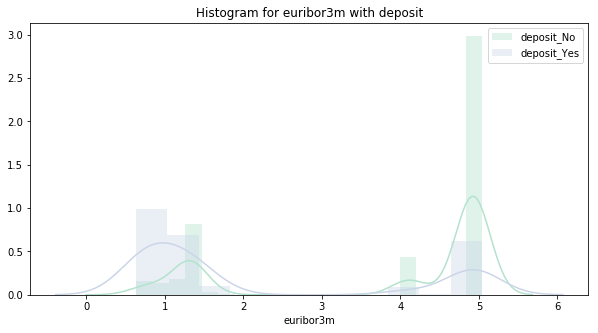

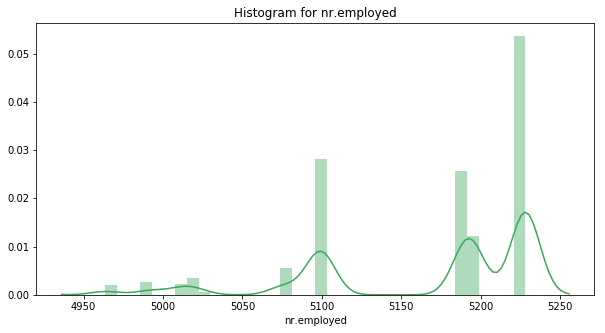

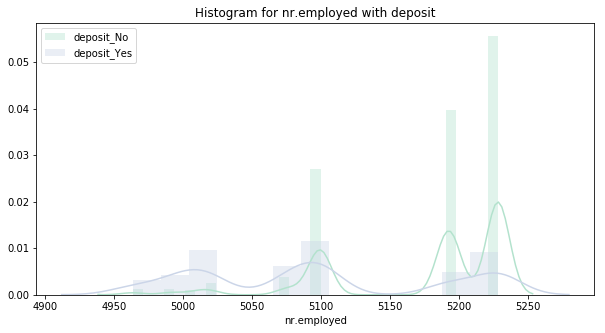

In [9]:
# histogram for numerical variables
column = "job"
for column in dsdata.columns:
    if dsdata[column].dtype == "int64" or dsdata[column].dtype == "float64":
        histogram(column)
        histogram_by_deposit(column)

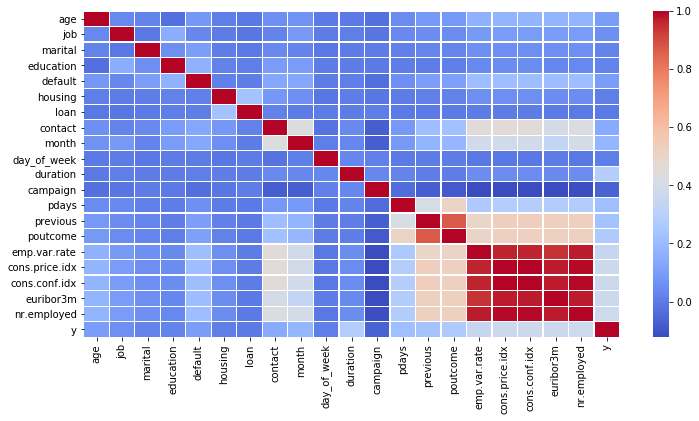

In [10]:
plt.figure(figsize=(12, 6))
corr = dsdata.apply(lambda x: pd.factorize(x)[0]).corr()
ax = sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, linewidths=.2, cmap="coolwarm") #####??????????!!!